In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [32]:
dataframe = pd.DataFrame(columns=['date', 'taps on', 'taps off', 'total taps'])
folder = Path('OpalPatronage')
ind = 0
for file in folder.glob('*.txt'):
    try:
        df = pd.read_csv(file, sep='|')
        key = df['trip_origin_date'].unique()[0]
        date = pd.to_datetime(key)
        if date.month == 12 or (date.month == 1 and date.day == 1 and date.year > 2020):
            df = df[df['ti_region'] == 'All - NSW']
            df[['Tap_Ons','Tap_Offs']] = df[['Tap_Ons','Tap_Offs']].replace('<50',25)
            df[['Tap_Ons','Tap_Offs']] = df[['Tap_Ons','Tap_Offs']].replace('<100',50)
            df['tap_hour'] = df['tap_hour'].astype(int)
            df['Tap_Ons'] = df['Tap_Ons'].astype(int)
            df['Tap_Offs'] = df['Tap_Offs'].astype(int)
            dataframe.loc[ind] = [key, df['Tap_Ons'].sum(), df['Tap_Offs'].sum(), df['Tap_Ons'].sum() + df['Tap_Offs'].sum()]
            ind += 1
    except Exception:
        print(file.name, "could not be processed")



Opal_Patronage_20210604.txt could not be processed
Opal_Patronage_20210603.txt could not be processed
opal_patronage_filelist.txt could not be processed


In [33]:
dataframe = dataframe.sort_values(by='date')
dataframe

,date,taps on,taps off,total taps
113,2020-12-01,1372150,1372425,2744575
124,2020-12-02,1426500,1427350,2853850
116,2020-12-03,1461325,1461225,2922550
101,2020-12-04,1454750,1454675,2909425
87,2020-12-05,882775,884300,1767075
...,...,...,...,...
62,2024-12-28,1340250,1340200,2680450
58,2024-12-29,1201700,1202000,2403700
96,2024-12-30,1472000,1471400,2943400
91,2024-12-31,1464650,1465050,2929700


In [34]:
def generate_december_dates(year: int):
    start_date = pd.to_datetime(f'{year}-12-01')
    end_date = pd.to_datetime(f'{year + 1}-01-01')
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    return sorted(date_range.strftime('%Y-%m-%d').tolist())
print(generate_december_dates(2020))

['2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10', '2020-12-11', '2020-12-12', '2020-12-13', '2020-12-14', '2020-12-15', '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-19', '2020-12-20', '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-01']


In [37]:
def plot(year: int):
    dates = generate_december_dates(year)
    values = []
    for i in dates:
        for _, row in dataframe.iterrows():
            if row['date'] == i:
                values.append(row['total taps'] / 1e6)  # Convert to millions
                break
    labels = [str(i) for i in range(1, 32)] + ['New Year']
    plt.figure(figsize=(14, 6))
    plt.plot(dates, values, marker='o', linestyle='-')
    plt.xticks(dates, labels)
    plt.xlabel('Day')
    plt.ylabel('Total Patronage (millions)')
    plt.title(f'Patronage Time Series (01/12/{year} - 01/01/{year + 1})')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [43]:
# ...existing code...
def plot(year: int):
    dates = generate_december_dates(year)
    values = []
    for i in dates:
        for _, row in dataframe.iterrows():
            if row['date'] == i:
                values.append(row['total taps'] / 1e6)  # Convert to millions
                break

    labels = [str(i) for i in range(1, 32)] + ['New Year']
    plt.figure(figsize=(14, 6))
    plt.plot(dates, values, marker='o', linestyle='-', label='Patronage')

    # Highlight days 24, 25, 26, and New Year
    highlight_days = [24, 25, 26, 'New Year']
    highlight_indices = [23, 24, 25, 31]  # 0-based index for days 24, 25, 26, and New Year
    for idx in highlight_indices:
        plt.plot(dates[idx], values[idx], marker='o', color='red', markersize=10, label=f'Highlight {labels[idx]}')

    plt.xticks(dates, labels, rotation=45)
    plt.xlabel('Day')
    plt.ylabel('Total Patronage (millions)')
    plt.title(f'Patronage Time Series (01/12/{year} - 01/01/{year + 1})')
    plt.grid(True)
    plt.tight_layout()
    plt.legend(['Normal days', 'Holidays'])
    plt.show()
# ...existing code...

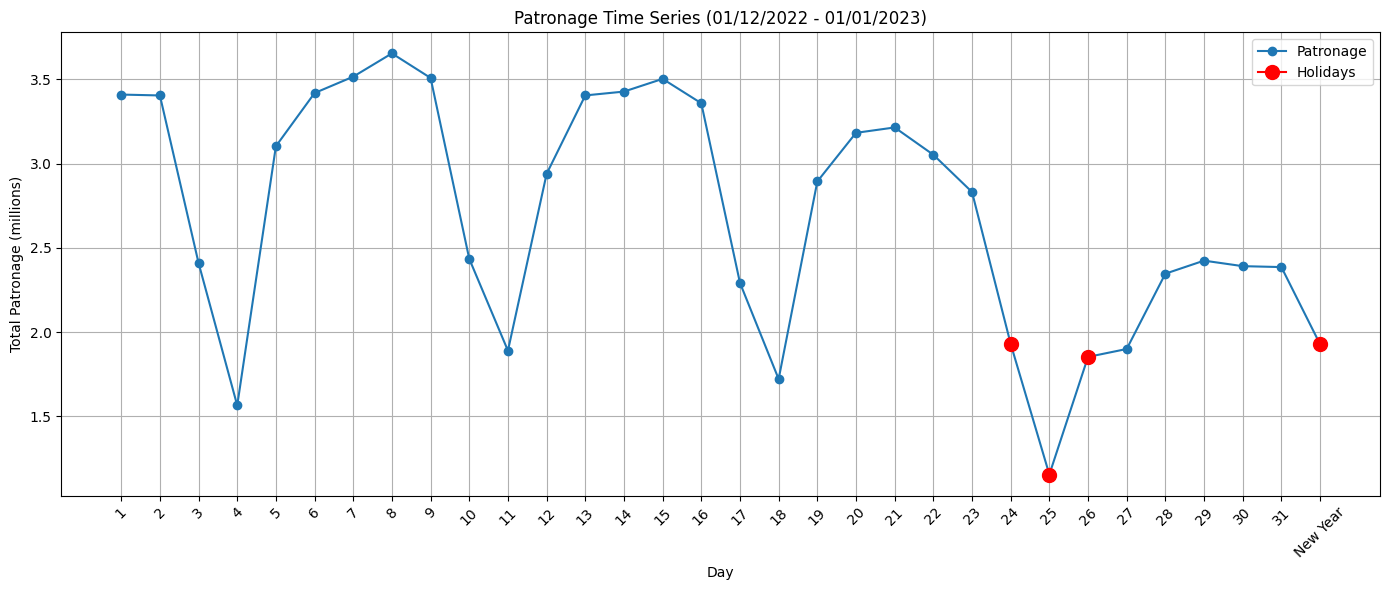

In [42]:
plot(2022)